# Reinforcement Learning

# Online control

This notebook presents the **online control** of an agent by SARSA and Q-learning.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from model import TicTacToe, Nim, ConnectFour
from agent import Agent, OnlineControl
from dp import ValueIteration

## Instructions

* You can work alone or in a team of 2.
* Indicate your name(s) here: XXX, YYY
* The script ``dp`` must contain your solution to ``ValueIteration`` (cf. lab on Dynamic Programming).
* Do not import any other code / library.
* Do not copy-paste any code or text from other students / teams.
* Be concise in your answers.
* Use at most 5 figures or tables.
* Make sure that your notebook runs without errors.
* Save your notebook with the figures / table.
* Upload your notebook on Moodle (one per team).

## To do

* Complete the class ``SARSA`` and test it on Tic-Tac-Toe.
* Complete the class ``QLearning`` and test it on Tic-Tac-Toe.
* Compare these algorithms on Tic-Tac-Toe (play first) and Nim (play second), using a random adversary, then a perfect adversary. Comment your results.
* Test these algorithms on Connect 4 against a random adversary. Comment your results.

connect four - state space is huge, these techniques are not suitable for this game

just concise figures and tables explaining the results

don't need to play with the initial value

test weather a new state is terminal or not
if it is terminal, then the reward is the reward of the game
if it is not terminal, then the reward is 0

## SARSA

In [3]:
class SARSA(OnlineControl):
    """Online control by SARSA."""
        
    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()
        state = self.model.state
        action = self.get_best_action(state, randomized=True) 
        for t in range(self.n_steps):
            state_code = self.model.encode(state)
            self.state_action_count[state_code][action] += 1
            reward, stop = self.model.step(action)
            # to be modified
            # begin
            gain = 0
            # end
            diff = gain - self.state_action_value[state_code][action]
            count = self.state_action_count[state_code][action]
            self.state_action_value[state_code][action] += diff / count
            if stop:
                break
            # to be modified
            # begin
            state = state
            action = action
            # end

In [4]:
class SARSA(OnlineControl):
    """Online control by SARSA."""
        
    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()
        state = self.model.state
        action = self.get_best_action(state, randomized=True) 
        for t in range(self.n_steps):
            state_code = self.model.encode(state)
            self.state_action_count[state_code][action] += 1
            reward, stop = self.model.step(action)
            new_state = self.model.state
            new_action = self.get_best_action(new_state, randomized=True)

            # SARSA update
            gain = reward + self.gamma * self.state_action_value[self.model.encode(new_state)][new_action]
            diff = gain - self.state_action_value[state_code][action]
            count = self.state_action_count[state_code][action]
            self.state_action_value[state_code][action] += diff / count

            if stop:
                break
            state, action = new_state, new_action


In [63]:
class SARSA(OnlineControl):
    """Online control by SARSA."""
        
    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()
        state = self.model.state
        action = self.get_best_action(state, randomized=True)
        for t in range(self.n_steps):
            state_code = self.model.encode(state)
            self.state_action_count[state_code][action] += 1
            reward, stop = self.model.step(action)

            # Handle terminal state or state with no actions
            if stop:
                gain = reward  # No future rewards since it's a terminal state
                next_action = None
            else:
                next_state = self.model.state
                next_action = self.get_best_action(next_state, randomized=True)
                if next_action is None:  # No valid actions available in next_state
                    gain = reward  # Only consider the immediate reward
                else:
                    next_state_code = self.model.encode(next_state)
                    gain = reward + self.gamma * self.state_action_value[next_state_code][next_action]

            # Update Q value
            diff = gain - self.state_action_value[state_code][action]
            count = self.state_action_count[state_code][action]
            self.state_action_value[state_code][action] += diff / count

            if stop or next_action is None:
                break

            state = next_state
            action = next_action


## Q-learning

In [5]:
class QLearning(OnlineControl):
    """Online control by Q-learning."""
        
    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()
        state = self.model.state
        action = self.get_best_action(state, randomized=True) 
        # to be completed

In [6]:
class QLearning(OnlineControl):
    """Online control by Q-learning."""
        
    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()
        state = self.model.state

        for t in range(self.n_steps):
            state_code = self.model.encode(state)
            action = self.get_best_action(state, randomized=True)
            self.state_action_count[state_code][action] += 1
            reward, stop = self.model.step(action)
            new_state = self.model.state

            # Q-Learning update
            best_future_action = self.get_best_action(new_state, randomized=False)
            gain = reward + self.gamma * self.state_action_value[self.model.encode(new_state)][best_future_action]
            diff = gain - self.state_action_value[state_code][action]
            count = self.state_action_count[state_code][action]
            self.state_action_value[state_code][action] += diff / count

            if stop:
                break
            state = new_state


In [15]:
class QLearning(OnlineControl):
    """Online control by Q-learning."""
        
    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()
        state = self.model.state
        for t in range(self.n_steps):
            action = self.get_best_action(state, randomized=True)
            state_code = self.model.encode(state)
            self.state_action_count[state_code][action] += 1
            reward, stop = self.model.step(action)
            
            # Modification starts here
            if stop:
                gain = reward
            else:
                next_state = self.model.state
                next_state_code = self.model.encode(next_state)
                max_next_q = max(self.state_action_value[next_state_code].values())
                gain = reward + self.gamma * max_next_q
            
            # Update Q value
            diff = gain - self.state_action_value[state_code][action]
            count = self.state_action_count[state_code][action]
            self.state_action_value[state_code][action] += diff / count

            if stop:
                break
            
            state = next_state
            # Modification ends here


In [22]:
class QLearning(OnlineControl):
    """Online control by Q-learning."""
        
    def learn(self):
        """Learn the state-action value online."""
        self.model.reinit_state()
        state = self.model.state
        for t in range(self.n_steps):
            action = self.get_best_action(state, randomized=True)
            state_code = self.model.encode(state)
            self.state_action_count[state_code][action] += 1
            reward, stop = self.model.step(action)
            
            # Modification starts here
            if stop:
                gain = reward
            else:
                next_state = self.model.state
                next_state_code = self.model.encode(next_state)
                # Check if next_state_code is in state_action_value and has non-empty values
                if next_state_code in self.state_action_value and self.state_action_value[next_state_code]:
                    max_next_q = max(self.state_action_value[next_state_code].values())
                else:
                    max_next_q = 0  # Default value if no actions have been explored for next_state
                gain = reward + self.gamma * max_next_q
            
            # Update Q value
            diff = gain - self.state_action_value[state_code][action]
            count = self.state_action_count[state_code][action]
            self.state_action_value[state_code][action] += diff / count

            if stop:
                break
            
            state = next_state
            # Modification ends here


## To do

In [64]:
Game = TicTacToe

In [65]:
game = Game()
agent = Agent(game)

In [66]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([37, 11, 52]))

In [67]:
Control = QLearning
Control = SARSA

In [68]:
algo = Control(game, eps=0.05)

In [90]:
n_games = 100000
for i in range(n_games):
    algo.learn()

In [91]:
policy = algo.get_policy()

In [92]:
agent = Agent(game, policy)

In [93]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([33, 12, 55]))

In [94]:
unique, counts = np.unique(agent.get_gains(), return_counts=True)
results = dict(zip(unique, counts))

In [95]:
results

{-1: 30, 0: 17, 1: 53}

0 0 0
0 0 0
0 0 0
1 0 0
0 0 0
0 0 0
-1 -1 -1
-1 -1 -1
-1 -1 -1
Game outcome: Lose


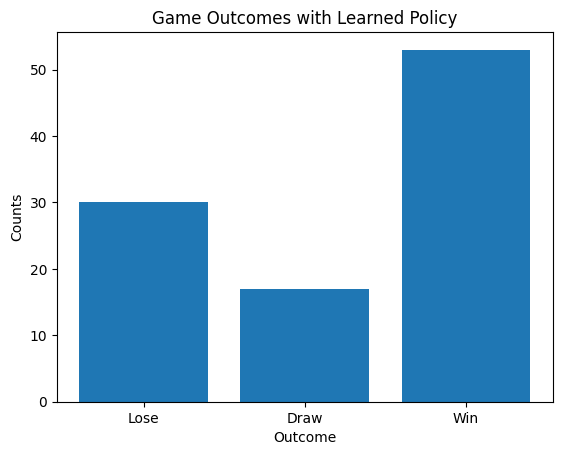

In [96]:
# Function to display the Tic-Tac-Toe board
def display_board(board):
    for row in board:
        print(" ".join(str(int(x)) for x in row))

# Play a game and display each move
game.reinit_state()
state = game.state
while not game.is_terminal(state):
    display_board(state[1])
    action = policy(state)[1][0]  # Select the action from the policy
    state = game.get_next_state(state, action)

# Show final board and outcome
display_board(state[1])
outcome = "Win" if game.get_reward(state) == 1 else "Draw" if game.get_reward(state) == 0 else "Lose"
print(f"Game outcome: {outcome}")

# Visualize results
plt.bar(results.keys(), results.values())
plt.title('Game Outcomes with Learned Policy')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.xticks(ticks=np.arange(-1, 2), labels=["Lose", "Draw", "Win"])
plt.show()